/tmp/ipykernel_641973/264014688.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_objects_per_score = data.groupby('score_range').apply(


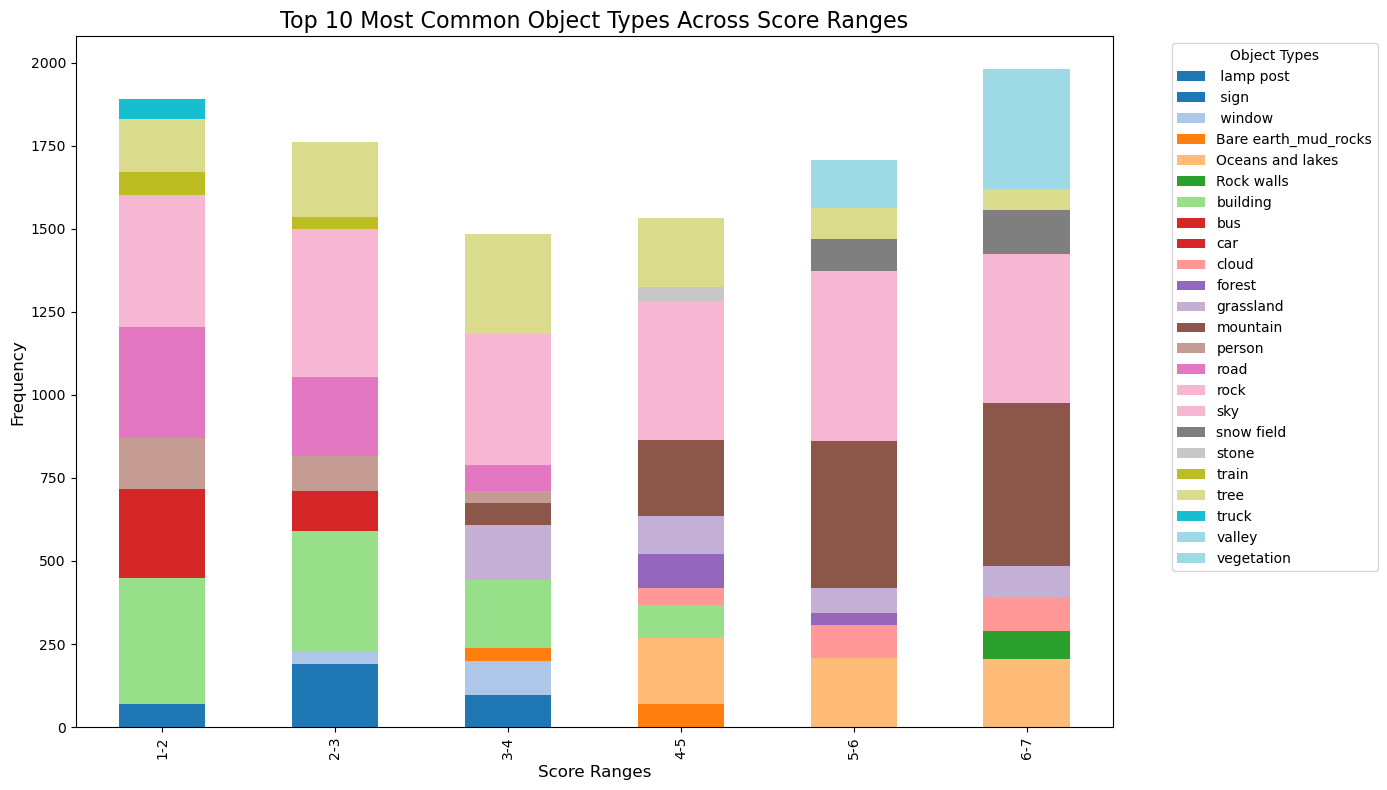

image has been saved to: /home/ubuntu/landscape-aesthetics/data/processed/landscape_ob/object_types_across_score_ranges.png


In [4]:
#Top 10 Most Common Object Types Across Score Ranges
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

file_location_path = Path.cwd()
project_base_path = file_location_path.parent.parent

file_path = project_base_path / 'data' / 'processed' / 'landscape_ob' / 'object_type_counts_sorted_by_score_range3.csv'

data = pd.read_csv(file_path)

if set(['score_range', 'object_types', 'count']).issubset(data.columns):

    top_objects_per_score = data.groupby('score_range').apply(
        lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

    pivot_data = top_objects_per_score.pivot(index='score_range', columns='object_types', values='count').fillna(0)

    plt.figure(figsize=(14, 8))

    #adjust color here
    pivot_data.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

    plt.title('Top 10 Most Common Object Types Across Score Ranges', fontsize=16)
    plt.xlabel('Score Ranges', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    plt.legend(title='Object Types', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    output_file = project_base_path / 'data' / 'processed' / 'landscape_ob' / 'object_types_across_score_ranges.png'
    output_file.parent.mkdir(parents=True, exist_ok=True)  
    plt.savefig(output_file, dpi=300)  

    plt.show()

    print(f"image has been saved to: {output_file}")

else:
    print("lack：'score_range', 'object_types', 'count'")


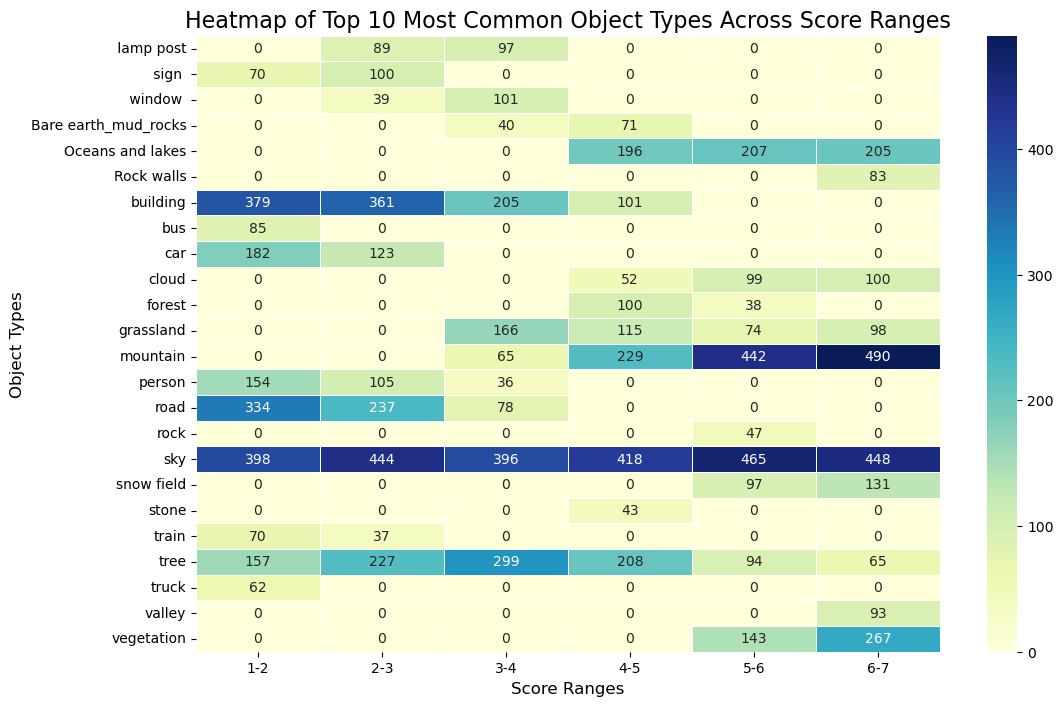

heat map has been saved to: /home/ubuntu/landscape-aesthetics/data/processed/landscape_ob/object_types_across_score_ranges_heatmap_transposed.png


In [5]:
#heatmap here
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

try:
    pivot_data
except NameError:
    print("run first cell please 'pivot_data'。")
else:
    pivot_data_transposed = pivot_data.T

    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_data_transposed, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=.5)

    plt.title('Heatmap of Top 10 Most Common Object Types Across Score Ranges', fontsize=16)
    plt.xlabel('Score Ranges', fontsize=12)
    plt.ylabel('Object Types', fontsize=12)

    output_file = Path.cwd().parent.parent / 'data' / 'processed' / 'landscape_ob' / 'object_types_across_score_ranges_heatmap_transposed.png'
    output_file.parent.mkdir(parents=True, exist_ok=True)  
    plt.savefig(output_file, dpi=300) 

    plt.show()

    print(f"heat map has been saved to: {output_file}")
